# 2 넘파이로 공부하는 선형대수

## 2.1 데이터와 행렬

In [12]:
import numpy as np  # for linalg
import matplotlib.pylab as plt  # for plotting

### 데이터의 유형
- 스칼라(Scalar): 숫자
- Vector: 여러 숫자로 이루어진 데이터 레코드
- Matrix: 벡터의 집합
- Tensor: 같은 크기의 행렬이 여러 개

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[0, :]

array([5.1, 3.5, 1.4, 0.2])

### 행렬

### 연습문제 2.1.1
Numpy를 사용해서 붓꽃 데이터 $x_2$에 대한 벡터변수 `x2`를 만든다.  
예측 문제의 입력 데이터는 대부분 벡터로 표시한다. 예를 들어 숫자 이미지를 입력받아 어떤 숫자인지 분류하는 문제를 생각해보자. 이미지는 원래 2차원 데이터이지만 예측 문제에서는 보통 1차원 벡터로 변환하여 사용한다. 다음은 사이킷런 패키지에서 제공하는 MNIST 숫자 이미지(digit image) 데이터셋이다. 이 데이터는 0부터 9까지의 숫자를 손으로 쓴 후에 8x8 해상도의 이미지로 스캔한 것이다. 다음 코드는 그중 숫자 0과 1의 이미지 8개를 출력한다.



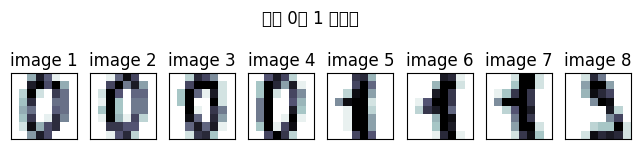

In [17]:
from sklearn.datasets import load_digits
import random

digits = load_digits()
samples = [0, 10, 20, 30, 1, 11, 21, 31]

d = []

for i in range(8):
    d.append(digits.images[samples[i]])
plt.figure(figsize=(8, 2))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(d[i], interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i + 1))
plt.suptitle("숫자 0과 1 이미지")
plt.show()

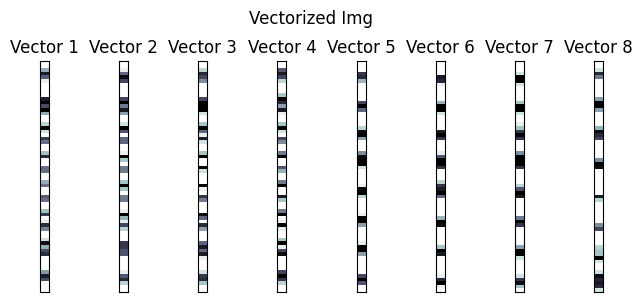

In [18]:
v = []
for i in range(8):
    v.append(d[i].reshape(64, 1))  # 1차원으로 펼침.
    
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(v[i], aspect=0.4,
               interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("Vector {}".format(i + 1))
plt.suptitle("Vectorized Img", y=1.05)
plt.show()

### 연습 문제 2.1.2
넘파이를 사용해서 붓꽃 데이터 X에 대한 행렬 변수 `X`를 만든다.

In [24]:
iris.__dir__()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
X = iris['data']
X.shape

(150, 4)

### 텐서

In [25]:
from scipy import misc

img_rgb = misc.face()    # color img
img_rgb.shape

/var/folders/g4/ftr2ppnj5d17097_s5dkl_100000gn/T/ipykernel_63683/1559701063.py:3: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img_rgb = misc.face()    # color img


(768, 1024, 3)

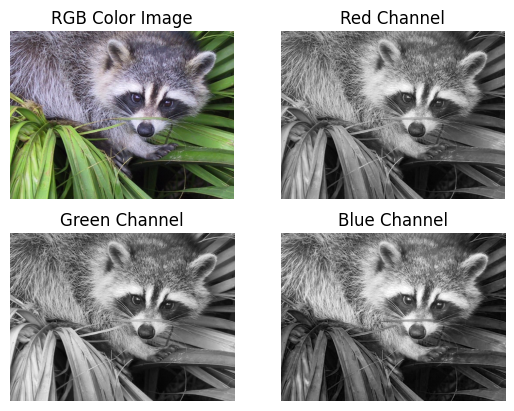

In [28]:
plt.subplot(221)
plt.imshow(img_rgb, cmap=plt.cm.gray)  # 컬러 이미지 출력
plt.axis("off")
plt.title("RGB Color Image")

plt.subplot(222)
plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.gray)  # red 채널 출력
plt.axis("off")
plt.title("Red Channel")

plt.subplot(223)
plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.gray)  # green Channel 출력
plt.axis("off")
plt.title("Green Channel")

plt.subplot(224)
plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.gray)  # blue Channel 출력
plt.axis("off")
plt.title("Blue Channel")

plt.show()

### 전치 연산
스칼라, 벡터, 행렬 데이터를 변형시켜 연산해보자! 전치(transpose)연산은 행렬에서 가장 기본이 되는 연산으로 T(superscript)를 붙여서 표시한다. 책에 따라 프라임(')를 붙이는 경우도 있다.

6\*4 -> 4\*6 로 전치
$$
\begin{split}
\begin{align}
X = 
\begin{bmatrix}
\boxed{\begin{matrix} x_{1, 1} & x_{1, 2} & x_{1, 3} & x_{1, 4}\end{matrix}}  \\
\begin{matrix} x_{2, 1} & x_{2, 2} & x_{2, 3} & x_{2, 4}\end{matrix} \\
\begin{matrix} x_{3, 1} & x_{3, 2} & x_{3, 3} & x_{3, 4}\end{matrix} \\
\begin{matrix} x_{4, 1} & x_{4, 2} & x_{4, 3} & x_{4, 4}\end{matrix} \\
\begin{matrix} x_{5, 1} & x_{5, 2} & x_{5, 3} & x_{5, 4}\end{matrix} \\
\begin{matrix} x_{6, 1} & x_{6, 2} & x_{6, 3} & x_{6, 4}\end{matrix} \\
\end{bmatrix}
\;\; \rightarrow \;\;
X^T = 
\begin{bmatrix}
\boxed{\begin{matrix} x_{1, 1} \\ x_{1, 2} \\ x_{1, 3} \\ x_{1, 4}\end{matrix}} &
\begin{matrix} x_{2, 1} \\ x_{2, 2} \\ x_{2, 3} \\ x_{2, 4}\end{matrix} &
\begin{matrix} x_{3, 1} \\ x_{3, 2} \\ x_{3, 3} \\ x_{3, 4}\end{matrix} &
\begin{matrix} x_{4, 1} \\ x_{4, 2} \\ x_{4, 3} \\ x_{4, 4}\end{matrix} &
\begin{matrix} x_{5, 1} \\ x_{5, 2} \\ x_{5, 3} \\ x_{5, 4}\end{matrix} &
\begin{matrix} x_{6, 1} \\ x_{6, 2} \\ x_{6, 3} \\ x_{6, 4}\end{matrix} &
\end{bmatrix}
\tag{2.1.17}
\end{align}
\end{split}

$$

In [30]:
print(f"{X.shape=}") # iris data
print(f"{X.T.shape=}") # iris data

X.shape=(150, 4)
X.T.shape=(4, 150)


In [37]:
# 1차원은 전치되지 않음
x1 = X[0]
print(f"{x1.shape=}")
print(f"{x1.T.shape=}")
print(f"{x1 == x1.T}")

x1.shape=(4,)
x1.T.shape=(4,)
[ True  True  True  True]


### 연습문제 2.1.3
1. np로 붓꽃 데이터의 전치행렬을 구한다.
2. np로 위 전치행렬을 다시 전치한 행렬 $(X^T)^T$을 구한다. 이 행렬을 원래 행렬과 비교한다.

In [40]:
# 1. (생략)
# 2.
Xt = X.T
X2t = Xt.T

print(np.array_equal(X2t, X))   # 같다.

True


In [41]:
np.ones((3, 1))     # ones-vector

array([[1.],
       [1.],
       [1.]])

### 대각행렬
행렬에서 행과 열이 같은 위치를 주 대각(main diagonal) 또는 간단히 **대각(diagonal)** 이라고 한다. 대각 위치에 있지 않은 것들은 **비대각(off-diagonal)** 이라고 한다. 모든 비대각 요소가 0인 행렬을 **대각행렬(diagonal matrix)** 이라고 한다.

In [42]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

### 항등행렬
대각행렬 중에서도 모든 대각성분의 값이 1인 대각행렬을 **항등행렬(identity matrix)** 이라고 한다. 항등행렬은 보통 알파벳 대문자 I로 표기한다.

In [43]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 대칭행렬
전치연산을 통해서 얻은 전치행렬과 원래의 행렬이 같이면 **대칭행렬 (symmetrrix matrix)** 이라고 한다. 정방행렬만 대칭행렬이 될 수 있다.

### 연습 문제 2.1.4
1. 영벡터, 일벡터, 정방행렬, 대각행렬, 항등행렬, 대칭행렬의 예를 하나씩 만들어본다.
2. 위의 벡터와 행렬을 NumPy로 나타내 본다.

In [45]:
# zero-vector
print(np.zeros(5))

# one-vector
print(np.ones(5))


[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


## 2.2 벡터와 행렬의 연산

### 벡터/행렬의 덧셈과 뺄셈

In [52]:
x = np.array([10, 11, 12, 13, 14])
y = np.array([0, 1, 2, 3, 4])

print(f"{x + y = }")   # 각 인덱스별로 더함
print(f"{x - y = }")  

x + y = array([10, 12, 14, 16, 18])
x - y = array([10, 10, 10, 10, 10])
